## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("GiveMeSomeCredit/cs-training.csv")#Importing data

In [3]:
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,30588,0,0.003032,53,0,5.967504,8000.0,60,0,60,0,0.0
1,104199,0,0.010846,60,0,1.041757,70000.0,38,0,32,0,0.0
2,65729,1,0.036942,43,0,0.719174,55966.0,41,0,29,0,0.0
3,18260,0,0.635363,61,6,0.429449,48000.0,33,1,26,0,1.0
4,68910,0,0.297748,44,0,1.237481,12400.0,42,0,25,0,2.0


In [4]:
train = train.drop(['Unnamed: 0'],axis = 1)

## Data shape and Overview

In [5]:
train.shape

(150000, 11)

In [6]:
train[train.columns[1:]].describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452773,0.265973,1.018280,0.240387,0.757222
std,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.146082,4.169304,1.131751,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,60.000000,98.000000,60.000000,98.000000,20.000000


## Duplicate Value Treatment

In [7]:
train.duplicated()#Checking if there are duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997     True
149998    False
149999    False
Length: 150000, dtype: bool

In [8]:
train.duplicated().sum()#total number of duplicates

np.int64(609)

In [9]:
train.duplicated().value_counts()#How many are not duplicates and how many are duplicates

False    149391
True        609
Name: count, dtype: int64

In [10]:
train_nodup = train.drop_duplicates()#Deleting the duplicate records

In [11]:
train_nodup.shape

(149391, 11)

## Null(Missing) Values Treatment

In [12]:
train_nodup.isnull()#Checking null values

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
149994,False,False,False,False,False,False,False,False,False,False,False
149995,False,False,False,False,False,False,False,False,False,False,False
149996,False,False,False,False,False,False,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,False


In [13]:
train_nodup.isnull().sum()#Total number of null values in each column

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29221
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3828
dtype: int64

In [14]:
#Creating a function to get percentage of null values for all columns of dataframe
def findMissPerc(df):
    return round(((df.isnull().sum()/df.shape[0])*100),2)

In [15]:
findMissPerc(train_nodup)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           19.56
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       2.56
dtype: float64

#### Say 'NumberOfDependents' is family and bifurcating data as per missing and not missing dependents

In [16]:
fam_miss = train_nodup[train_nodup.NumberOfDependents.isnull()]
fam_nomiss = train_nodup[train_nodup.NumberOfDependents.notnull()]

In [17]:
fam_miss.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,3828.000000,3828.000000,3828.000000,3828.000000,3828.000000,0.0,3828.000000,3828.000000,3828.000000,3828.000000,0.0
mean,0.046499,11.003369,59.741641,0.572623,1110.713689,NaN,5.708986,0.497126,0.605799,0.474138,NaN
std,0.210592,240.656436,18.345175,6.527320,4235.410634,NaN,4.086337,6.523199,0.920990,6.520343,NaN
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.009228,48.000000,0.000000,25.000000,NaN,3.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.047670,61.000000,0.000000,398.000000,NaN,5.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.259028,74.000000,0.000000,1587.000000,NaN,8.000000,0.000000,1.000000,0.000000,NaN
max,1.000000,10821.000000,109.000000,98.000000,220516.000000,NaN,30.000000,98.000000,15.000000,98.000000,NaN


#### In above description we can see that missing rows of dependents also have monthly income missing

In [18]:
fam_miss.shape

(3828, 11)

In [19]:
fam_nomiss.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,145563.000000,145563.000000,145563.000000,145563.000000,145563.000000,1.201700e+05,145563.000000,145563.000000,145563.000000,145563.000000,145563.000000
mean,0.067538,5.941378,52.110701,0.389185,334.548251,6.675098e+03,8.553801,0.231309,1.033388,0.205622,0.759863
std,0.250952,250.510835,14.567652,3.756944,1947.228209,1.438958e+04,5.141267,3.728803,1.135149,3.712455,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.031218,41.000000,0.000000,0.173934,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.158817,52.000000,0.000000,0.359090,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.561085,62.000000,0.000000,0.770641,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,107.000000,98.000000,329664.000000,3.008750e+06,60.000000,98.000000,60.000000,98.000000,20.000000


In [20]:
fam_nomiss.shape

(145563, 11)

#### But there exists missing values of monthly income where dependents are not missing

In [21]:
df_fam_notMiss_but_income_missing = train_nodup[train_nodup.NumberOfDependents.notnull() & train_nodup.MonthlyIncome.isnull()]
df_fam_notMiss_but_income_missing.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,25393.000000,25393.000000,25393.000000,25393.000000,25393.000000,0.0,25393.000000,25393.000000,25393.000000,25393.000000,25393.000000
mean,0.058126,6.116924,55.890639,0.434372,1791.786713,NaN,7.556177,0.333832,0.929036,0.300673,0.321309
std,0.233987,216.369668,14.714024,4.903186,4279.088509,NaN,4.877719,4.893579,1.046646,4.880670,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.018514,45.000000,0.000000,253.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.089364,56.000000,0.000000,1311.000000,NaN,7.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.448911,66.000000,0.000000,2507.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,107.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [22]:
df_fam_notMiss_but_income_missing.shape

(25393, 11)

In [23]:
findMissPerc(fam_nomiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

#### Creating functions for number of records in each group in a column, and percent weight of each group in that column


In [24]:
def GroupByPerc(df,column):
    return df.groupby(column).size()/len(df)*100

def GroupBy(df,column):
    return df.groupby(column).size()

#### Dealing with rows which have number of dependents missing 

In [25]:
train_nodup['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [26]:
GroupBy(train_nodup,train_nodup['NumberOfDependents'])#Grouping using function defined above
#It will not include the missing values

NumberOfDependents
0.0     86392
1.0     26314
2.0     19521
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
dtype: int64

In [27]:
#proof that above groups for the column 'Number of dependents' does not include missing values
print(f"Total no. of records in above groups: \n{GroupBy(train_nodup,train_nodup['NumberOfDependents']).sum()}")
print(f"Total no. of records in the column: \n{len(train_nodup['NumberOfDependents'])}")
print(f"Hence missing no. of records = {len(train_nodup['NumberOfDependents']) - GroupBy(train_nodup,train_nodup['NumberOfDependents']).sum()}")

Total no. of records in above groups: 
145563
Total no. of records in the column: 
149391
Hence missing no. of records = 3828


#### As we have seen earlier all missing values of dependents implied monthly income is also missing. Hence filling Number of dependents in these rows as 0(mode of the variable) and leaving the monthly income values to be populated later


In [28]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)

C:\Users\nakul\AppData\Local\Temp\ipykernel_6316\3489319309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)


In [29]:
findMissPerc(fam_miss)

SeriousDlqin2yrs                          0.0
RevolvingUtilizationOfUnsecuredLines      0.0
age                                       0.0
NumberOfTime30-59DaysPastDueNotWorse      0.0
DebtRatio                                 0.0
MonthlyIncome                           100.0
NumberOfOpenCreditLinesAndLoans           0.0
NumberOfTimes90DaysLate                   0.0
NumberRealEstateLoansOrLines              0.0
NumberOfTime60-89DaysPastDueNotWorse      0.0
NumberOfDependents                        0.0
dtype: float64

#### No missing values of number of dependents now but Monthly incomes missing here(to be filled later). Additionally in the 2nd of the bifurcated dataframe of 'dependents not missing but income missing'

In [30]:
findMissPerc(fam_nomiss)

SeriousDlqin2yrs                         0.00
RevolvingUtilizationOfUnsecuredLines     0.00
age                                      0.00
NumberOfTime30-59DaysPastDueNotWorse     0.00
DebtRatio                                0.00
MonthlyIncome                           17.44
NumberOfOpenCreditLinesAndLoans          0.00
NumberOfTimes90DaysLate                  0.00
NumberRealEstateLoansOrLines             0.00
NumberOfTime60-89DaysPastDueNotWorse     0.00
NumberOfDependents                       0.00
dtype: float64

In [31]:
fam_nomiss['MonthlyIncome'].agg(['mean','median','min','max'])

mean      6.675098e+03
median    5.400000e+03
min       0.000000e+00
max       3.008750e+06
Name: MonthlyIncome, dtype: float64

#### As the income value has a very wide range, converting all values of income into a freuency distribution table. It will give a suitable interval to choose the approximate value to fill missing values in monthly income column 


In [32]:
fam_nomiss['bins'] = pd.cut(fam_nomiss['MonthlyIncome'], bins=50)
frequency_distribution_equal_width = fam_nomiss['bins'].value_counts().sort_index()
frequency_distribution_equal_width

C:\Users\nakul\AppData\Local\Temp\ipykernel_6316\1615344529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nomiss['bins'] = pd.cut(fam_nomiss['MonthlyIncome'], bins=50)


bins
(-3008.75, 60175.0]       119950
(60175.0, 120350.0]          165
(120350.0, 180525.0]          25
(180525.0, 240700.0]           8
(240700.0, 300875.0]           5
(300875.0, 361050.0]           2
(361050.0, 421225.0]           1
(421225.0, 481400.0]           2
(481400.0, 541575.0]           0
(541575.0, 601750.0]           2
(601750.0, 661925.0]           2
(661925.0, 722100.0]           2
(722100.0, 782275.0]           1
(782275.0, 842450.0]           1
(842450.0, 902625.0]           0
(902625.0, 962800.0]           0
(962800.0, 1022975.0]          0
(1022975.0, 1083150.0]         1
(1083150.0, 1143325.0]         0
(1143325.0, 1203500.0]         0
(1203500.0, 1263675.0]         0
(1263675.0, 1323850.0]         0
(1323850.0, 1384025.0]         0
(1384025.0, 1444200.0]         0
(1444200.0, 1504375.0]         0
(1504375.0, 1564550.0]         1
(1564550.0, 1624725.0]         0
(1624725.0, 1684900.0]         0
(1684900.0, 1745075.0]         0
(1745075.0, 1805250.0]         1
(1805

#### As most of the values are on the lower side, hence choosing median in place of missing values and dropping the extra column - 'bins' created above


In [33]:
fam_nomiss['MonthlyIncome'] = fam_nomiss['MonthlyIncome'].fillna(fam_nomiss['MonthlyIncome'].median())
fam_nomiss = fam_nomiss.drop('bins', axis=1)

C:\Users\nakul\AppData\Local\Temp\ipykernel_6316\2931653688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_nomiss['MonthlyIncome'] = fam_nomiss['MonthlyIncome'].fillna(fam_nomiss['MonthlyIncome'].median())


#### Populating the missing values of incomes in the first of the bifurcated data frame where missing number of dependents were populated by its mode = 0

In [34]:
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(fam_nomiss['MonthlyIncome'].median())

C:\Users\nakul\AppData\Local\Temp\ipykernel_6316\2817937159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(fam_nomiss['MonthlyIncome'].median())


In [35]:
findMissPerc(fam_nomiss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [36]:
findMissPerc(fam_miss)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

#### No more missing values, now appending the earlier bifurcated data frame

In [37]:
filled_train = pd.concat([fam_nomiss,fam_miss])

In [38]:
findMissPerc(filled_train)

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [39]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.003032,53,0,5.967504,8000.0,60,0,60,0,0.0
1,0,0.010846,60,0,1.041757,70000.0,38,0,32,0,0.0
2,1,0.036942,43,0,0.719174,55966.0,41,0,29,0,0.0
3,0,0.635363,61,6,0.429449,48000.0,33,1,26,0,1.0
4,0,0.297748,44,0,1.237481,12400.0,42,0,25,0,2.0


### Column 1 = 'SeriousDlqin2yrs' is the target variable that shows whether the customer defaulted or not

In [40]:
print(f"\033[1mTotal Records:-\033[0m\n{filled_train.shape[0]}")#'\033[1m' & '\033[0m' used to start and end bold printing
print(f"\n\033[1mCount of defaulters:-\033[0m\n{GroupBy(filled_train,filled_train['SeriousDlqin2yrs'])}")
print(f"\n\033[1mPercent of defaulters:-\033[0m\n{GroupByPerc(filled_train,filled_train['SeriousDlqin2yrs'])}")

Total Records:-
149391

Count of defaulters:-
SeriousDlqin2yrs
0    139382
1     10009
dtype: int64

Percent of defaulters:-
SeriousDlqin2yrs
0    93.300132
1     6.699868
dtype: float64


### Rearranging columns and performing individual variable analysis for remaining variables

In [41]:
filled_train = filled_train.reindex(columns=['SeriousDlqin2yrs','RevolvingUtilizationOfUnsecuredLines',
                                             'NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines',
                                             'age','DebtRatio','NumberOfTime30-59DaysPastDueNotWorse',
                                             'NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate',
                                             'MonthlyIncome','NumberOfDependents'])


In [42]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    149391.000000
mean          6.071087
std         250.263672
min           0.000000
25%           0.030132
50%           0.154235
75%           0.556494
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### Most of the rows have value less than 1, checking quantile

In [43]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.9])

0.9    0.978007
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [44]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.97])

0.97    1.0
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

#### We can see 97% values are less than 1 in column 'RevolvingUtilizationOfUnsecuredLines'. But can we delete all other values, are they insignificant?

In [45]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>1]).groupby('SeriousDlqin2yrs').size()

SeriousDlqin2yrs
0    2084
1    1237
dtype: int64

#### Hence there are still many significant rows which contribute to deault


In [46]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10]).groupby('SeriousDlqin2yrs').size()

SeriousDlqin2yrs
0    224
1     17
dtype: int64

In [47]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines']>10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,MonthlyIncome,NumberOfDependents
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,0.070539,3564.023932,5.763485,1.186722,50.630705,571.918644,0.186722,0.087137,0.074689,7602.103734,0.651452
std,0.256587,5123.802683,3.114160,1.065750,14.565389,1772.948412,0.579502,0.559651,0.579711,5726.519076,1.022093
min,0.000000,11.385230,1.000000,0.000000,24.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,941.000000,4.000000,0.000000,39.000000,0.217813,0.000000,0.000000,0.000000,5400.000000,0.000000
50%,0.000000,2012.000000,5.000000,1.000000,48.000000,0.402560,0.000000,0.000000,0.000000,5400.000000,0.000000
75%,0.000000,4116.000000,7.000000,2.000000,62.000000,59.000000,0.000000,0.000000,0.000000,8607.000000,1.000000
max,1.000000,50708.000000,21.000000,9.000000,87.000000,21395.000000,3.000000,7.000000,8.000000,44472.000000,4.000000


#### These values are not much sigificant(as these are very less number of records), hence dropping them


In [48]:
train_drop1 = filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)
train_drop1.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,MonthlyIncome,NumberOfDependents
count,149150.000000,149150.000000,149150.000000,149150.000000,149150.000000,149150.000000,149150.000000,149150.000000,149150.000000,1.491500e+05,149150.000000
mean,0.066993,0.322065,8.485297,1.022166,52.308944,354.085328,0.394221,0.212705,0.238384,6.423787e+03,0.740536
std,0.250011,0.365943,5.138114,1.132271,14.726114,2042.235713,3.855986,3.813531,3.829178,1.292397e+04,1.108403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.030027,5.000000,0.000000,41.000000,0.177334,0.000000,0.000000,0.000000,3.900000e+03,0.000000
50%,0.000000,0.153564,8.000000,1.000000,52.000000,0.368200,0.000000,0.000000,0.000000,5.400000e+03,0.000000
75%,0.000000,0.553558,11.000000,2.000000,63.000000,0.874241,0.000000,0.000000,0.000000,7.400000e+03,1.000000
max,1.000000,8.851852,60.000000,60.000000,109.000000,329664.000000,98.000000,98.000000,98.000000,3.008750e+06,20.000000


#### Analysing other variables


In [49]:
train_drop1['NumberOfOpenCreditLinesAndLoans'].describe()

count    149150.000000
mean          8.485297
std           5.138114
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          60.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

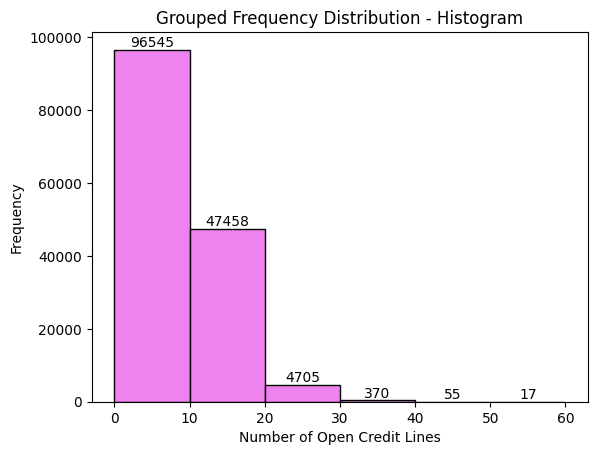

In [50]:
#Grouped frequency distribution with counts on each bar

counts, bins, patches = plt.hist(train_drop1['NumberOfOpenCreditLinesAndLoans'], bins=6, edgecolor='black', color='violet')#the main graph

# Add frequency labels on top of bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
             ha='center', va='bottom')

plt.xlabel('Number of Open Credit Lines')
plt.ylabel('Frequency')
plt.title('Grouped Frequency Distribution - Histogram')
plt.show()

#### Seems not much problem with this variable, moving on to next column


In [51]:
train_drop1['NumberRealEstateLoansOrLines'].describe()


count    149150.000000
mean          1.022166
std           1.132271
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          60.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

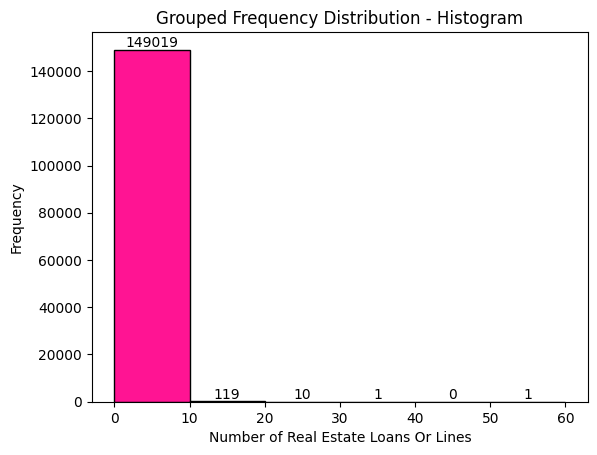

In [52]:
#Grouped frequency distribution with counts on each bar

counts, bins, patches = plt.hist(train_drop1['NumberRealEstateLoansOrLines'], bins=6, edgecolor='black', color='deeppink')#the main graph

# Add frequency labels on top of bars
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, int(count),
             ha='center', va='bottom')

plt.xlabel('Number of Real Estate Loans Or Lines')
plt.ylabel('Frequency')
plt.title('Grouped Frequency Distribution - Histogram')
plt.show()

#### Seems no problem in this variable. Now,analysing the age variable


In [53]:
train_drop1['age'].describe()

count    149150.000000
mean         52.308944
std          14.726114
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

<Axes: ylabel='age'>

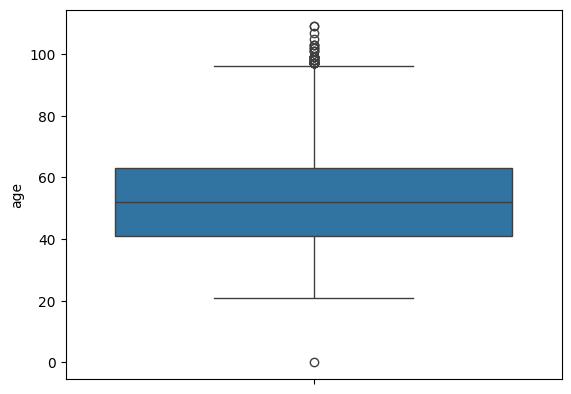

In [54]:
sns.boxplot(train_drop1['age'])

#### Dropping the tuple with age zero


In [55]:
#train_drop1.drop(['age'] == 0,axis=1)
train_drop1.drop(train_drop1[train_drop1['age'] == 0].index, inplace=True)

##### Here we have used 'inplace = True' which unlike earlier drop (used in dropping 'RevolvingUtilizationOfUnsecuredLines') directly modifies and updates the dataframe with dropped value(s), without using inplace or using 'inplace = False' gives a new data frame with dropped values (can be saved with another name) and it does not drop the said values in the original dataframe

<Axes: ylabel='age'>

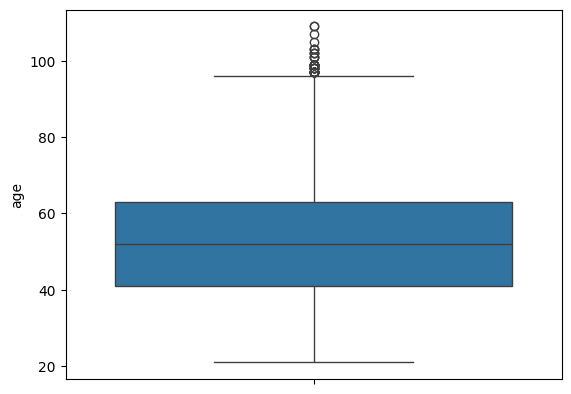

In [56]:
sns.boxplot(train_drop1['age'])

In [57]:
train_drop1.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,MonthlyIncome,NumberOfDependents
count,149149.000000,149149.000000,149149.000000,149149.000000,149149.000000,149149.000000,149149.000000,149149.000000,149149.000000,1.491490e+05,149149.000000
mean,0.066993,0.322060,8.485313,1.022159,52.309295,354.087699,0.394217,0.212707,0.238386,6.423790e+03,0.740528
std,0.250011,0.365940,5.138127,1.132272,14.725541,2042.242354,3.855998,3.813544,3.829191,1.292401e+04,1.108402
min,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.030026,5.000000,0.000000,41.000000,0.177333,0.000000,0.000000,0.000000,3.900000e+03,0.000000
50%,0.000000,0.153560,8.000000,1.000000,52.000000,0.368196,0.000000,0.000000,0.000000,5.400000e+03,0.000000
75%,0.000000,0.553548,11.000000,2.000000,63.000000,0.874244,0.000000,0.000000,0.000000,7.400000e+03,1.000000
max,1.000000,8.851852,60.000000,60.000000,109.000000,329664.000000,98.000000,98.000000,98.000000,3.008750e+06,20.000000


#### Checking Debt Ratio, which ideally should be less than 1

In [58]:
train_drop1['DebtRatio'].describe()

count    149149.000000
mean        354.087699
std        2042.242354
min           0.000000
25%           0.177333
50%           0.368196
75%           0.874244
max      329664.000000
Name: DebtRatio, dtype: float64

#### Here more than 75% rows are with 'less than 1' Debt Ratio, but there's a problem with other rows. Delving in that:-


In [59]:
print(f"\033[1mDebt Ratio > 1\033[0m \n{GroupBy(train_drop1[train_drop1['DebtRatio']>1],train_drop1['SeriousDlqin2yrs'])}")
print(f"\033[1mDebt Ratio < 1\033[0m \n{GroupBy(train_drop1[train_drop1['DebtRatio']<1],train_drop1['SeriousDlqin2yrs'])}")

Debt Ratio > 1 
SeriousDlqin2yrs
0    32767
1     2286
dtype: int64
Debt Ratio < 1 
SeriousDlqin2yrs
0    106168
1      7703
dtype: int64


#### There are decent percentage of defaulters with these anomalitic values of Debt Ratio, dealing with them

In [60]:
train_drop1['bins'] = pd.cut(train_drop1['DebtRatio'], bins=50)
frequency_distribution_equal_width = train_drop1['bins'].value_counts().sort_index()
frequency_distribution_equal_width

bins
(-329.664, 6593.28]       148525
(6593.28, 13186.56]          538
(13186.56, 19779.84]          44
(19779.84, 26373.12]          15
(26373.12, 32966.4]            5
(32966.4, 39559.68]            6
(39559.68, 46152.96]           3
(46152.96, 52746.24]           2
(52746.24, 59339.52]           0
(59339.52, 65932.8]            3
(65932.8, 72526.08]            0
(72526.08, 79119.36]           0
(79119.36, 85712.64]           0
(85712.64, 92305.92]           0
(92305.92, 98899.2]            0
(98899.2, 105492.48]           1
(105492.48, 112085.76]         2
(112085.76, 118679.04]         0
(118679.04, 125272.32]         0
(125272.32, 131865.6]          0
(131865.6, 138458.88]          0
(138458.88, 145052.16]         0
(145052.16, 151645.44]         0
(151645.44, 158238.72]         0
(158238.72, 164832.0]          0
(164832.0, 171425.28]          1
(171425.28, 178018.56]         0
(178018.56, 184611.84]         0
(184611.84, 191205.12]         0
(191205.12, 197798.4]          0
(1977

#### There are varying number of defaulters for these huge values of Debt Ratio, dropping the rows with value from 3rd interval onwards and then removing the bin column created for intervals


In [61]:
print(train_drop1.shape)
train_drop2 = train_drop1.drop(train_drop1[train_drop1['DebtRatio']>13186.56].index)
train_drop2.drop('bins', axis=1,inplace = True)
print(train_drop2.shape)

(149149, 12)
(149063, 11)


In [62]:
train_drop2.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,MonthlyIncome,NumberOfDependents
count,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,1.490630e+05,149063.00000
mean,0.066972,0.322069,8.481582,1.019971,52.307065,331.021184,0.394149,0.212783,0.238490,6.424707e+03,0.74074
std,0.249974,0.365960,5.134644,1.124490,14.726783,1009.249456,3.857026,3.814635,3.830287,1.292763e+04,1.10851
min,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000
25%,0.000000,0.030028,5.000000,0.000000,41.000000,0.177237,0.000000,0.000000,0.000000,3.900000e+03,0.00000
50%,0.000000,0.153546,8.000000,1.000000,52.000000,0.367869,0.000000,0.000000,0.000000,5.400000e+03,0.00000
75%,0.000000,0.553624,11.000000,2.000000,63.000000,0.870773,0.000000,0.000000,0.000000,7.400000e+03,1.00000
max,1.000000,8.851852,60.000000,60.000000,109.000000,13119.000000,98.000000,98.000000,98.000000,3.008750e+06,20.00000


#### Moving on to next variables - columns with delayed payments 

In [63]:
GroupBy(train_drop2,train_drop2['NumberOfTime30-59DaysPastDueNotWorse'])

NumberOfTime30-59DaysPastDueNotWorse
0     125177
1      16007
2       4579
3       1749
4        747
5        341
6        139
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       220
dtype: int64

In [64]:
GroupBy(train_drop2,train_drop2['NumberOfTime60-89DaysPastDueNotWorse'])

NumberOfTime60-89DaysPastDueNotWorse
0     141520
1       5718
2       1116
3        318
4        104
5         34
6         16
7          8
8          2
9          1
11         1
96         5
98       220
dtype: int64

In [65]:
GroupBy(train_drop2,train_drop2['NumberOfTimes90DaysLate'])

NumberOfTimes90DaysLate
0     140792
1       5224
2       1553
3        666
4        291
5        131
6         80
7         38
8         20
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       220
dtype: int64

#### Clearly there's some problem with frequency of late payments showing 96 and 98 day delay. Hence instead simply deleting them, first checking their impact on actual default.


In [66]:
print(train_drop2[train_drop2['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size())
print(train_drop2[train_drop2['NumberOfTime60-89DaysPastDueNotWorse']>=96].groupby(['SeriousDlqin2yrs']).size())
print(train_drop2[train_drop2['NumberOfTime30-59DaysPastDueNotWorse']>=96].groupby(['SeriousDlqin2yrs']).size())


SeriousDlqin2yrs
0     89
1    136
dtype: int64
SeriousDlqin2yrs
0     89
1    136
dtype: int64
SeriousDlqin2yrs
0     89
1    136
dtype: int64


#### Here we can see there are multiple defaulters for these rows, hence keeing them as it is for now and moving on to the analysis

In [67]:
train_drop2.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,MonthlyIncome,NumberOfDependents
count,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,149063.000000,1.490630e+05,149063.00000
mean,0.066972,0.322069,8.481582,1.019971,52.307065,331.021184,0.394149,0.212783,0.238490,6.424707e+03,0.74074
std,0.249974,0.365960,5.134644,1.124490,14.726783,1009.249456,3.857026,3.814635,3.830287,1.292763e+04,1.10851
min,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.00000
25%,0.000000,0.030028,5.000000,0.000000,41.000000,0.177237,0.000000,0.000000,0.000000,3.900000e+03,0.00000
50%,0.000000,0.153546,8.000000,1.000000,52.000000,0.367869,0.000000,0.000000,0.000000,5.400000e+03,0.00000
75%,0.000000,0.553624,11.000000,2.000000,63.000000,0.870773,0.000000,0.000000,0.000000,7.400000e+03,1.00000
max,1.000000,8.851852,60.000000,60.000000,109.000000,13119.000000,98.000000,98.000000,98.000000,3.008750e+06,20.00000


## All variables are dealt with, now renaming the final training dataframe and proceeeding with the Model

In [68]:
final_train = train_drop2
print(f"\033[1mShape of data:-\033[0m\n{final_train.shape}")
print(f"\n\033[1mTrue Count of defaulters:-\033[0m\n{GroupBy(final_train,['SeriousDlqin2yrs'])}")
print(f"\n\033[1mTrue Percentage of defaulters:-\033[0m\n{GroupByPerc(final_train,['SeriousDlqin2yrs'])}")


Shape of data:-
(149063, 11)

True Count of defaulters:-
SeriousDlqin2yrs
0    139080
1      9983
dtype: int64

True Percentage of defaulters:-
SeriousDlqin2yrs
0    93.302832
1     6.697168
dtype: float64


In [69]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score, roc_curve, auc

### Creating the model with XGBoost-Classifier
#### The parameter tree_method='exact' is used here in XGBClassifier. It builds decision trees in the XGBoost model. It uses a greedy algorithm to find the best split for each tree node by scanning all possible split points, and gives very accurate values.

In [70]:
model = XGBClassifier(tree_method = 'exact')

#### Seperating the true values of target variable as a seperate column and rest of the features to build the model and check accuracy later 

In [71]:
y_true = final_train['SeriousDlqin2yrs']
x = final_train.drop(['SeriousDlqin2yrs'],axis=1)
x.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,age,DebtRatio,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,MonthlyIncome,NumberOfDependents
0,0.003032,60,60,53,5.967504,0,0,0,8000.0,0.0
1,0.010846,38,32,60,1.041757,0,0,0,70000.0,0.0
2,0.036942,41,29,43,0.719174,0,0,0,55966.0,0.0
3,0.635363,33,26,61,0.429449,6,0,1,48000.0,1.0
4,0.297748,42,25,44,1.237481,0,0,0,12400.0,2.0


In [72]:
model.fit(x,y_true.values.ravel())
y_pred = model.predict(x)
y_pred_proba = model.predict_proba(x)[:, 1]

#### Checking accuracy of predicted values viz a viz true values

In [73]:
acc_scr = accuracy_score(y_true,y_pred)
print(f"\033[1mModel Accuracy:-\033[0m\n{acc_scr*100}%")
print(f"\n\033[1mPredicted Count of defaulters:-\033[0m\n{GroupBy(pd.DataFrame(y_pred, columns=['SeriousDlqin2yrs']),['SeriousDlqin2yrs'])}")
print(f"\n\033[1mPredicted Percentage of defaulters:-\033[0m\n{GroupByPerc(pd.DataFrame(y_pred, columns=['SeriousDlqin2yrs']),['SeriousDlqin2yrs'])}")

Model Accuracy:-
94.58752339614793%

Predicted Count of defaulters:-
SeriousDlqin2yrs
0    145206
1      3857
dtype: int64

Predicted Percentage of defaulters:-
SeriousDlqin2yrs
0    97.412503
1     2.587497
dtype: float64


In [74]:
print('\033[1m The Classification Report:-\033[0m\n')
print(classification_report(y_true,y_pred))

 The Classification Report:-

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    139080
           1       0.75      0.29      0.42      9983

    accuracy                           0.95    149063
   macro avg       0.85      0.64      0.69    149063
weighted avg       0.94      0.95      0.93    149063



In [76]:
auc = roc_auc_score(y_true, y_pred_proba)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.9053


## Creating and visualising the confusion matrix

In [77]:
cm = confusion_matrix(y_true,y_pred)#Creating a confusion matrix to see true & false +ves and -ves
print(cm)

[[138109    971]
 [  7097   2886]]


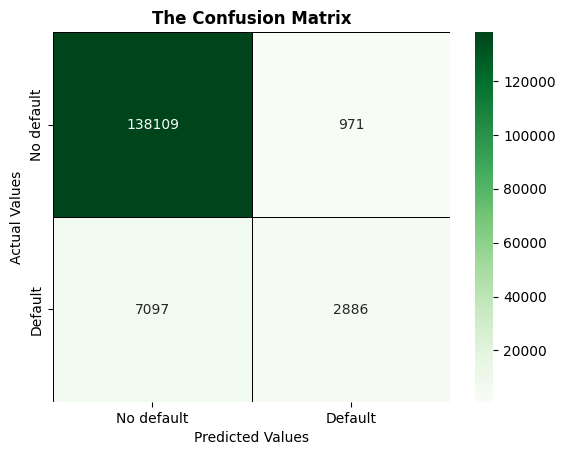

In [78]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Greens',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No default','Default'])
plt.yticks(np.arange(2)+.5,['No default','Default'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("The Confusion Matrix", fontweight='bold')
plt.show()